In [1]:
%%capture
cd ..

In [2]:
import pandas as pd
import pytest
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

from survival_data_handler.main import SurvivalEstimation, Lifespan, TimeCurveData
from survival_data_handler.utils import smooth, process_survival_function, \
    compute_derivative
from survival_data_handler.base import TimeCurveInterpolation


In [3]:
rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')
curves = cph.predict_survival_function(rossi).T
curves.columns = pd.to_timedelta(curves.columns.to_numpy() * 7, unit="D")

$S(t) = \mathbb{P}(T < t)$

/home/vlaurent/PROJET/tools/survival-estimation/survival_data_handler/base.py:73: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.__interpolation = {


<Axes: >

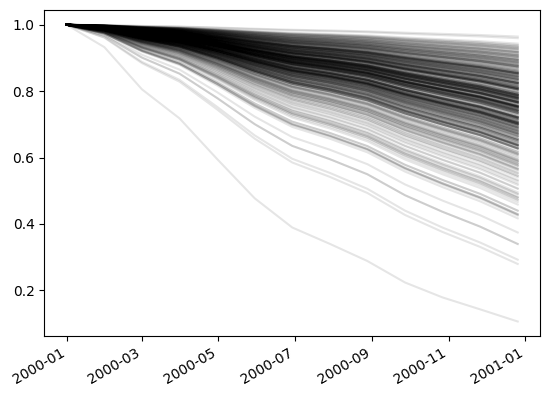

In [4]:
age = pd.to_timedelta(rossi["age"] * 365.25, unit="D")
birth = pd.to_datetime('2000')
rossi["index"] = rossi.index
lifespan = Lifespan(
    curves,
    index=rossi["index"],
    birth=birth,
    age=age,
    window=(pd.to_datetime("2000"), pd.to_datetime("2001"))
)
lifespan.survival_function.T.plot(legend=False, color="k", alpha=0.1)

$h(t) =-S'(t) / S(t)$

<Axes: >

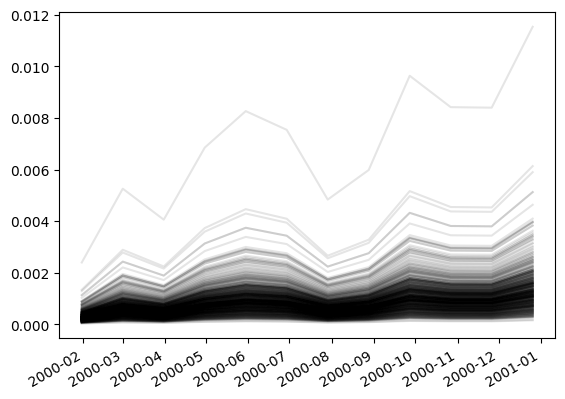

In [5]:
lifespan.hazard_function.T.plot(legend=False, color="k", alpha=0.1)

$f(t) =-S'(t)$

<Axes: >

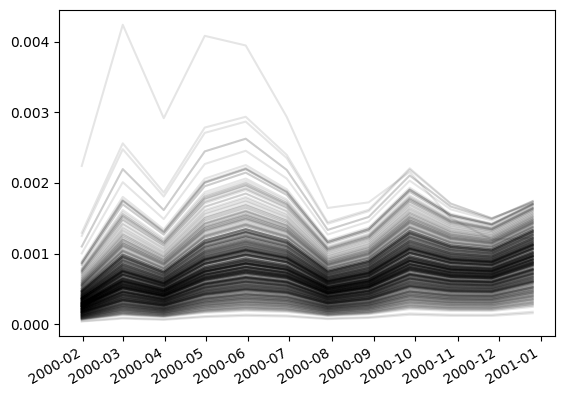

In [6]:
lifespan.density_function.T.plot(legend=False, color="k", alpha=0.1)

$\Lambda (t) = -log(S(t)) $

<Axes: >

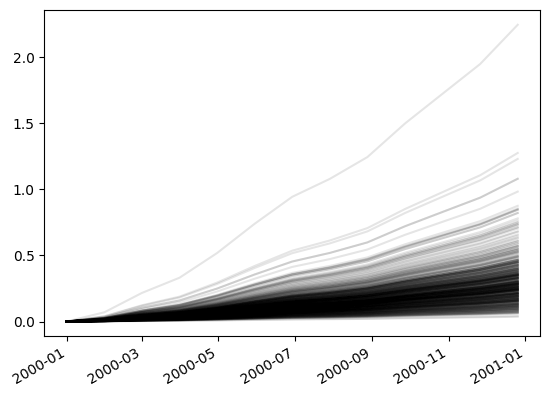

In [7]:
lifespan.cumulative_hazard_function.T.plot(legend=False, color="k", alpha=0.1)

<Axes: >

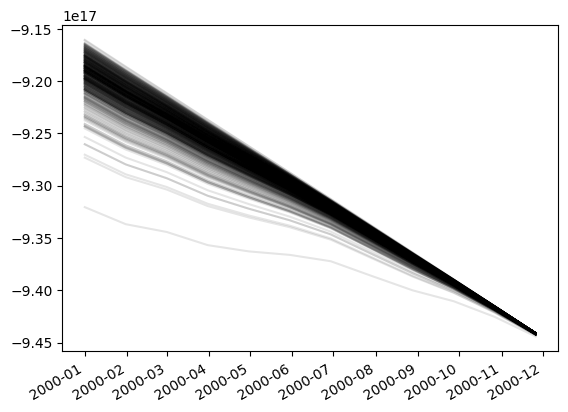

In [8]:
lifespan.residual_life.T.plot(legend=False, color="k", alpha=0.1)